In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import dash
from dash import dcc
from dash import html
import plotly.graph_objects as go
import plotly.graph_objs as go

Just checking the data of one stock as of now

In [210]:
CIPLA_df = pd.read_csv("D:\Study\Project\Stocks-Visualizing-and-Analysis\Datasets\CIPLA.NS .csv")
CIPLA_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-04-02,548.000000,578.950012,545.900024,576.250000,562.826416,2823880
1,2018-04-03,572.000000,578.349976,568.799988,570.299988,557.014954,2493190
2,2018-04-04,572.349976,575.450012,564.500000,569.799988,556.526672,1852997
3,2018-04-05,574.000000,578.549988,558.349976,560.349976,547.296753,2396864
4,2018-04-06,560.299988,571.000000,557.250000,558.950012,545.929382,2420324


In [211]:
#as the data is too big. i am rounding of the data aftdr decimals.
CIPLA_df = CIPLA_df.round(2)
CIPLA_df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-04-02,548.0,578.95,545.9,576.25,562.83,2823880
1,2018-04-03,572.0,578.35,568.8,570.30,557.01,2493190


In [212]:
CIPLA_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [213]:
CIPLA_df.dropna(inplace = True, axis = 0)

In [214]:
#here is checked the size of data
CIPLA_df.shape

(989, 7)

In [215]:
#here checking if there is any null values in the dataset
CIPLA_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

in the output of null values we found that there is not null value in the dataset

In [216]:
#lets check the datatypes of each the column
CIPLA_df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [217]:
#here we can see that data is in object format. pandas has inbuilt functions for data but the data should be in type ‘datetime64(ns)’
CIPLA_df['Date'] = pd.to_datetime(CIPLA_df['Date'])
CIPLA_df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-04-02,548.0,578.95,545.9,576.25,562.83,2823880
1,2018-04-03,572.0,578.35,568.8,570.30,557.01,2493190


In [218]:
CIPLA_df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

here we can see that the datatype of the data column changed to datetime64[ns]

In [219]:
#here we can check total duration of analysis
CIPLA_df['Date'].max()-CIPLA_df['Date'].min()

Timedelta('1459 days 00:00:00')

In [220]:
#describe function in pandas is used to get the descriptive data from the data. and with that i have used to astype to change the data from the float to the int.
CIPLA_df.iloc[-90:].describe().astype(int)

,Open,High,Low,Close,Adj Close,Volume
count,90,90,90,90,90,90
mean,939,951,928,939,935,2887035
std,49,51,48,49,48,2262806
min,864,880,850,860,856,947538
25%,901,914,891,906,902,1650087
50%,926,936,917,927,923,2180040
75%,954,975,943,957,952,3023565
max,1077,1083,1049,1068,1062,14458893


# Stock Visualisation

OPEN PRICE VISUALIZATION

In [221]:
cipla_plot_line=px.line(x="Date",y="Open",data_frame=CIPLA_df,title="Cipla Open Price Visualization")
cipla_plot_line.show()

CLOSE PRICE VISUALIZATION

In [222]:
cipla_plot_line=px.line(x="Date",y="Close",data_frame=CIPLA_df,title="Cipla Close Price Visualization")
cipla_plot_line.show()

ADJ. CLOSE PRICE VISUALIZATION

In [223]:
cipla_plot_line=px.line(x="Date",y="Adj Close",data_frame=CIPLA_df,title="Cipla Adj. Close Price Visualization")
cipla_plot_line.show()

VOLUME PRICE VISUALIZATION

In [224]:
cipla_plot_line=px.line(x="Date",y="Volume",data_frame=CIPLA_df,title="Cipla Volume Price Visualization")
cipla_plot_line.show()

# Day to Day percentage change (Daily returns)

Daily percentage change in the price of the stock is calculated on the basis of percentage change between 2 consecutive days’ closing prices

Q)What does daily percentage means?

A)So if the stock opening price is 100rs and the stock closes as 150rs. So the percentage change here is 50%




Q)So what is now the day to day percentage change?

A)The daily return of day 1 and day 2. And the percentage change in the returns is day to day percentage change. 14 -- dr, -15 


In [225]:
CIPLA_df['Day_Perc_Change'] = CIPLA_df['Adj Close'].pct_change()*100
CIPLA_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day_Perc_Change
0,2018-04-02,548.00,578.95,545.90,576.25,562.83,2823880,NaN
1,2018-04-03,572.00,578.35,568.80,570.30,557.01,2493190,-1.034060
2,2018-04-04,572.35,575.45,564.50,569.80,556.53,1852997,-0.086174
3,2018-04-05,574.00,578.55,558.35,560.35,547.30,2396864,-1.658491
4,2018-04-06,560.30,571.00,557.25,558.95,545.93,2420324,-0.250320


In [226]:
CIPLA_df.dropna(axis = 0, inplace = True)

In [227]:
cipla_plot_line=px.line(x="Date",y="Day_Perc_Change",data_frame=CIPLA_df,title="Percent Change Price Visualization")
cipla_plot_line.show()

I observed here that the mostly the spike is between the -2% and 2% and there are some few spikes between 10 to -10 percent on both the sides.

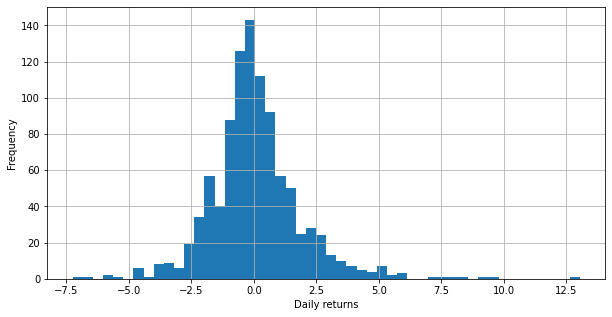

count    988.000000
mean       0.076328
std        1.845496
min       -7.256982
25%       -0.851701
50%       -0.055870
75%        0.830774
max       13.037224
Name: Day_Perc_Change, dtype: float64

In [228]:
CIPLA_df['Day_Perc_Change'].hist(bins = 50, figsize = (10,5)) 
plt.xlabel('Daily returns')
plt.ylabel('Frequency')
plt.show()#satistics
CIPLA_df.Day_Perc_Change.describe()

# Trend Analysis

Here we will make a function to define the trend. Will do it with the if  else statements.

In [229]:
def trend(x):
    if x > -0.5 and x <= 0.5:
        return 'Slight or No change'
    elif x > 0.5 and x <= 1:
        return 'Slight Positive'
    elif x > -1 and x <= -0.5:
        return 'Slight Negative'
    elif x > 1 and x <= 3:
        return 'Positive'
    elif x > -3 and x <= -1:
        return 'Negative'
    elif x > 3 and x <= 7:
        return 'Among top gainers'
    elif x > -7 and x <= -3:
        return 'Among top losers'
    elif x > 7:
        return 'Bull run'
    elif x <= -7:
        return 'Bear drop'
CIPLA_df['Trend']= np.zeros(CIPLA_df['Day_Perc_Change'].count())
CIPLA_df['Trend']= CIPLA_df['Day_Perc_Change'].apply(lambda x:trend(x))
CIPLA_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day_Perc_Change,Trend
1,2018-04-03,572.00,578.35,568.80,570.30,557.01,2493190,-1.034060,Negative
2,2018-04-04,572.35,575.45,564.50,569.80,556.53,1852997,-0.086174,Slight or No change
3,2018-04-05,574.00,578.55,558.35,560.35,547.30,2396864,-1.658491,Negative
4,2018-04-06,560.30,571.00,557.25,558.95,545.93,2420324,-0.250320,Slight or No change
5,2018-04-09,565.90,565.90,555.50,556.75,543.78,1470765,-0.393823,Slight or No change


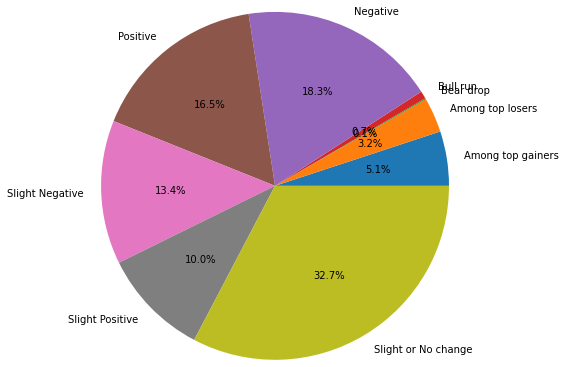

In [230]:
cipla_pie_data = CIPLA_df.groupby('Trend')
pie_label = sorted([i for i in CIPLA_df.loc[:, 'Trend'].unique()])
plt.pie(cipla_pie_data['Trend'].count(), labels = pie_label, autopct = '%1.1f%%', radius = 2)

plt.show()

# Daily Returns and Volumes

<AxesSubplot: xlabel='Date'>

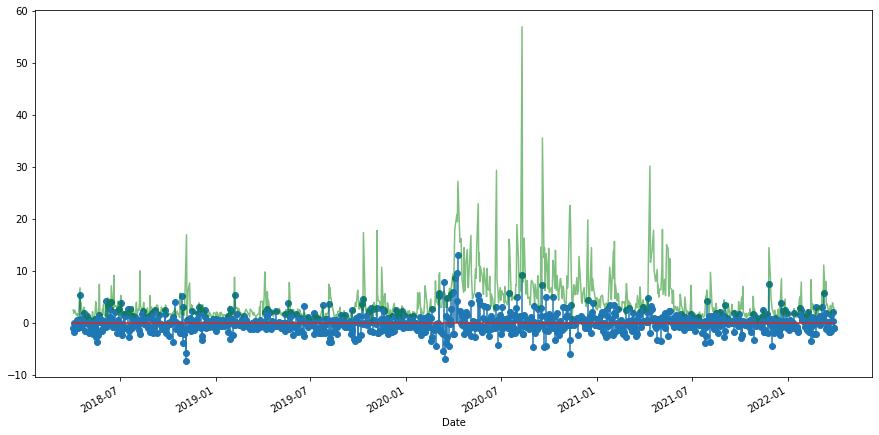

In [231]:
#to set the date column to index in dataframe to make the plotting easy
CIPLA_df.index =CIPLA_df['Date']
plt.stem(CIPLA_df['Date'], CIPLA_df['Day_Perc_Change'])
(CIPLA_df['Volume']/1000000).plot(figsize = (15, 7.5), color = 'green', alpha = 0.5)

# Moving Average

In [232]:
ma_day = [10,20,50]

df1 =pd.DataFrame()
df1['Date']=CIPLA_df['Date']
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    df1[column_name]=pd.DataFrame.rolling(CIPLA_df['Adj Close'],ma).mean() 

In [233]:
Cipla_close_price_ma=px.line(x='Date',y=['MA for 10 days','MA for 20 days','MA for 50 days'],data_frame=df1,title="Cipla stock price trend")
Cipla_close_price_ma.show()

# CANDLE CHART

In [234]:
fig=go.Figure(data =[go.Candlestick(x=CIPLA_df.Date,open=CIPLA_df.Open,high=CIPLA_df.High,low=CIPLA_df.Low,close=CIPLA_df.Close)])
fig.show()